# 第一章：A股市场与金融数据基础
## 1.2 常见金融数据类型（K线、分笔、财报、公告等）

本节内容：
- K线数据的获取与分析
- 分笔数据的获取与分析
- 财报数据的获取与分析
- 公告数据的获取与分析
- 各类数据的可视化展示


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import akshare as ak
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from pylab import mpl
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

# 设置中文字体
font_path = '/Users/max/Downloads/simkai.ttf'  # 指定字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 确保输出目录存在
output_dir = './outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("="*80)
print("第一章：A股市场与金融数据基础 - 1.2 常见金融数据类型")
print("="*80)


第一章：A股市场与金融数据基础 - 1.2 常见金融数据类型


# 1.2.1 K线数据（历史行情数据）

K线数据是金融市场中最基础也是最重要的数据类型之一。
K线图又称蜡烛图，由日本江户时代的一位期货交易员本间宗久发明。

K线数据包含以下6个要素：
- 开盘价（Open）：交易时间段内的第一个交易价格
- 收盘价（Close）：交易时间段内的最后一个交易价格
- 最高价（High）：交易时间段内的最高交易价格
- 最低价（Low）：交易时间段内的最低交易价格
- 成交量（Volume）：交易时间段内的总成交量
- 成交额（Amount）：交易时间段内的总成交金额

K线数据按采样频率周期可分为：
- 分钟线（1分钟、5分钟、15分钟、30分钟、60分钟等）
- 日线（每日）
- 周线（每周）
- 月线（每月）
- 季线（每季度）
- 年线（每年）


正在获取上证指数（000001）近1个月的日K线数据...

上证指数 K线数据结构：
数据形状：(30, 6)
数据列名：['date', 'open', 'high', 'low', 'close', 'volume']

数据前5行：
            date      open      high       low     close       volume
8413  2025-06-09  3388.778  3402.050  3383.074  3399.772  42734794700
8414  2025-06-10  3402.013  3406.452  3365.667  3384.816  48161856800
8415  2025-06-11  3385.457  3413.513  3385.457  3402.316  42409031300
8416  2025-06-12  3397.972  3408.205  3388.866  3402.658  40949061000
8417  2025-06-13  3397.484  3401.553  3370.592  3376.996  51006522100

K线数据已保存至：./outputs/kline_data_sh000001.csv


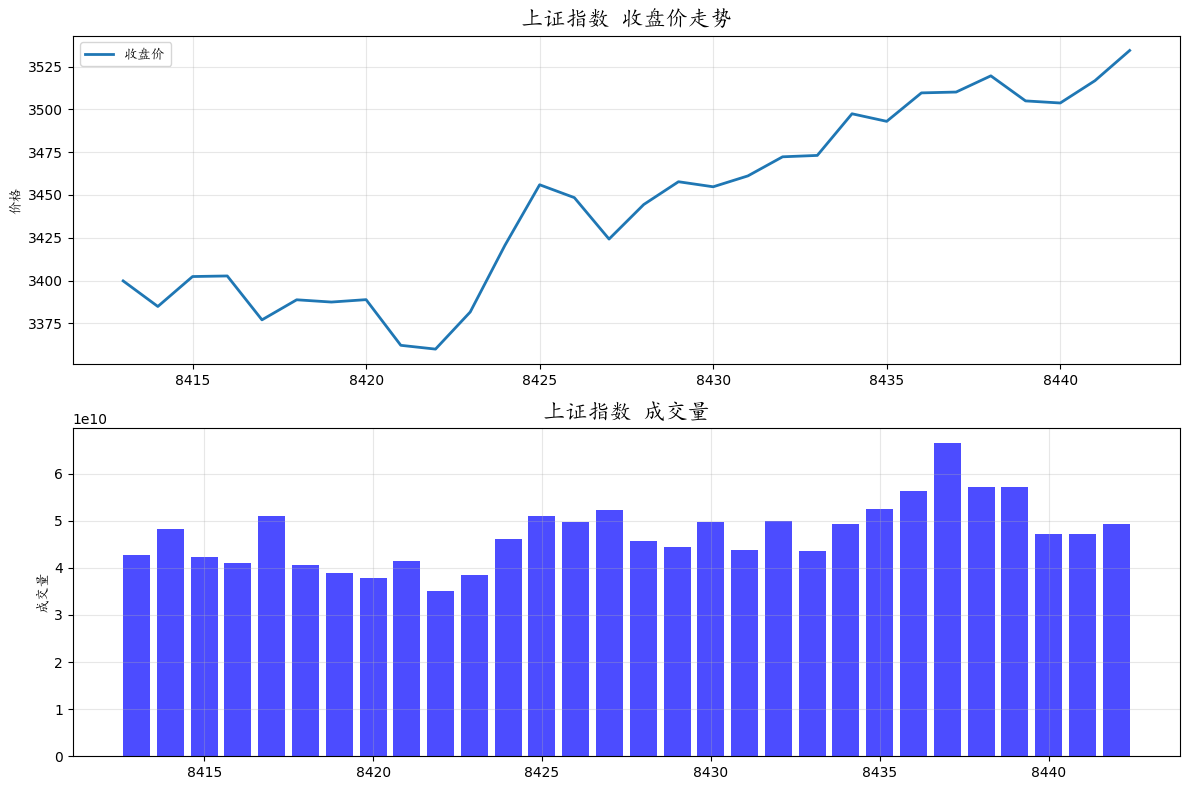


K线图表已保存至：./outputs/kline_visualization_sh000001.png


In [2]:
try:
    # 获取上证指数日K线数据
    print("正在获取上证指数（000001）近1个月的日K线数据...")
    stock_code = "sh000001"
    stock_name = "上证指数"

    # 获取最近一个月的K线数据
    end_date = datetime.now().strftime('%Y%m%d')
    start_date = (datetime.now() - timedelta(days=30)).strftime('%Y%m%d')

    # 使用akshare获取K线数据
    kline_data = ak.stock_zh_index_daily(symbol=stock_code)

    # 取最近30天的数据
    kline_data = kline_data.tail(30)

    print(f"\n{stock_name} K线数据结构：")
    print(f"数据形状：{kline_data.shape}")
    print(f"数据列名：{list(kline_data.columns)}")
    print(f"\n数据前5行：")
    print(kline_data.head())

    # 保存K线数据
    kline_data.to_csv(f'{output_dir}/kline_data_{stock_code}.csv', index=False)
    print(f"\nK线数据已保存至：{output_dir}/kline_data_{stock_code}.csv")

    # 可视化K线数据
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # 价格图表
    ax1.plot(kline_data.index, kline_data['close'], label='收盘价', linewidth=2)
    ax1.set_title(f'{stock_name} 收盘价走势', fontproperties=font_prop, fontsize=16)
    ax1.set_ylabel('价格', fontproperties=font_prop)
    ax1.legend(prop=font_prop)
    ax1.grid(True, alpha=0.3)

    # 成交量图表
    ax2.bar(kline_data.index, kline_data['volume'], alpha=0.7, color='blue')
    ax2.set_title(f'{stock_name} 成交量', fontproperties=font_prop, fontsize=16)
    ax2.set_ylabel('成交量', fontproperties=font_prop)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{output_dir}/kline_visualization_{stock_code}.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nK线图表已保存至：{output_dir}/kline_visualization_{stock_code}.png")

except Exception as e:
    print(f"获取K线数据时出错：{e}")

# 1.2.2 财报数据（财务报表数据）

财报数据是上市公司定期公布的财务报表信息，是基本面分析的重要数据源。
主要包括三大财务报表：

1. 资产负债表（Balance Sheet）
   - 反映企业某一时点的财务状况
   - 包括资产、负债、所有者权益等信息

2. 利润表（Income Statement）
   - 反映企业一定期间的经营成果
   - 包括营业收入、营业成本、净利润等信息

3. 现金流量表（Cash Flow Statement）
   - 反映企业现金及现金等价物流入流出情况
   - 包括经营活动、投资活动、筹资活动现金流

财报数据的特点：
- 周期性：通常按季度或年度公布
- 权威性：经过审计的正式财务信息
- 全面性：涵盖企业财务状况的各个方面
- 滞后性：数据公布存在时间滞后


In [7]:
try:
    # 获取茅台的财报数据
    print("正在获取贵州茅台（600519）的财报数据...")
    stock_code = "600519"
    stock_name = "贵州茅台"
    
    # 获取财务数据
    financial_data = ak.stock_financial_analysis_indicator(symbol=stock_code)
    
    print(f"\n{stock_name} 财报数据结构：")
    print(f"数据形状：{financial_data.shape}")
    print(f"数据列名：{list(financial_data.columns)}")
    print(f"\n数据前5行：")
    print(financial_data.head())
    
    # 保存财报数据
    financial_data.to_csv(f'{output_dir}/financial_data_{stock_code}.csv', index=False)
    print(f"\n财报数据已保存至：{output_dir}/financial_data_{stock_code}.csv")
    
    # 财报数据可视化
    if not financial_data.empty and '净利润' in financial_data.columns:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # 营业收入和净利润趋势
        dates = financial_data['日期']
        revenue = financial_data['营业收入'] if '营业收入' in financial_data.columns else []
        profit = financial_data['净利润'] if '净利润' in financial_data.columns else []
        
        if len(revenue) > 0:
            ax1.plot(dates, revenue, marker='o', label='营业收入', linewidth=2)
            ax1.set_title(f'{stock_name} 营业收入趋势', fontproperties=font_prop, fontsize=16)
            ax1.set_ylabel('营业收入（万元）', fontproperties=font_prop)
            ax1.legend(prop=font_prop)
            ax1.grid(True, alpha=0.3)
            plt.setp(ax1.get_xticklabels(), rotation=45)
        
        if len(profit) > 0:
            ax2.plot(dates, profit, marker='o', label='净利润', linewidth=2, color='red')
            ax2.set_title(f'{stock_name} 净利润趋势', fontproperties=font_prop, fontsize=16)
            ax2.set_ylabel('净利润（万元）', fontproperties=font_prop)
            ax2.legend(prop=font_prop)
            ax2.grid(True, alpha=0.3)
            plt.setp(ax2.get_xticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/financial_visualization_{stock_code}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n财报图表已保存至：{output_dir}/financial_visualization_{stock_code}.png")
    
except Exception as e:
    print(f"获取财报数据时出错：{e}")


正在获取贵州茅台（600519）的财报数据...


  0%|          | 0/28 [00:00<?, ?it/s]


贵州茅台 财报数据结构：
数据形状：(98, 86)
数据列名：['日期', '摊薄每股收益(元)', '加权每股收益(元)', '每股收益_调整后(元)', '扣除非经常性损益后的每股收益(元)', '每股净资产_调整前(元)', '每股净资产_调整后(元)', '每股经营性现金流(元)', '每股资本公积金(元)', '每股未分配利润(元)', '调整后的每股净资产(元)', '总资产利润率(%)', '主营业务利润率(%)', '总资产净利润率(%)', '成本费用利润率(%)', '营业利润率(%)', '主营业务成本率(%)', '销售净利率(%)', '股本报酬率(%)', '净资产报酬率(%)', '资产报酬率(%)', '销售毛利率(%)', '三项费用比重', '非主营比重', '主营利润比重', '股息发放率(%)', '投资收益率(%)', '主营业务利润(元)', '净资产收益率(%)', '加权净资产收益率(%)', '扣除非经常性损益后的净利润(元)', '主营业务收入增长率(%)', '净利润增长率(%)', '净资产增长率(%)', '总资产增长率(%)', '应收账款周转率(次)', '应收账款周转天数(天)', '存货周转天数(天)', '存货周转率(次)', '固定资产周转率(次)', '总资产周转率(次)', '总资产周转天数(天)', '流动资产周转率(次)', '流动资产周转天数(天)', '股东权益周转率(次)', '流动比率', '速动比率', '现金比率(%)', '利息支付倍数', '长期债务与营运资金比率(%)', '股东权益比率(%)', '长期负债比率(%)', '股东权益与固定资产比率(%)', '负债与所有者权益比率(%)', '长期资产与长期资金比率(%)', '资本化比率(%)', '固定资产净值率(%)', '资本固定化比率(%)', '产权比率(%)', '清算价值比率(%)', '固定资产比重(%)', '资产负债率(%)', '总资产(元)', '经营现金净流量对销售收入比率(%)', '资产的经营现金流量回报率(%)', '经营现金净流量与净利润的比率(%)', '经营现金净流量对负债比率(%)', '现金流量比率(%)', '短期股票投资(元)', '短期债券投资(元)', '短期其它经

# 1.2.3 公告数据（企业公告信息）
* akshare 接口废弃

公告数据是上市公司发布的各类公告信息，是影响股价的重要信息源。
主要包括：

1. 定期报告
   - 年度报告、半年度报告、季度报告
   - 业绩预告、业绩快报

2. 重大事项公告
   - 重大资产重组、收购兼并
   - 股权变动、高管变动
   - 分红派息、增资扩股

3. 监管公告
   - 监管问询函回复
   - 风险提示公告
   - 停牌复牌公告

公告数据的特点：
- 时效性：对市场反应敏感
- 重要性：直接影响投资决策
- 不规律性：发布时间不固定
- 多样性：公告类型繁多

In [8]:
try:
    # 获取比亚迪的公告数据
    print("正在获取比亚迪（002594）的公告数据...")
    stock_code = "002594"
    stock_name = "比亚迪"
    
    # 获取公司公告
    announcement_data = ak.stock_notices(symbol=stock_code)
    
    print(f"\n{stock_name} 公告数据结构：")
    print(f"数据形状：{announcement_data.shape}")
    print(f"数据列名：{list(announcement_data.columns)}")
    print(f"\n最新10条公告：")
    print(announcement_data.head(10))
    
    # 保存公告数据
    announcement_data.to_csv(f'{output_dir}/announcement_data_{stock_code}.csv', index=False)
    print(f"\n公告数据已保存至：{output_dir}/announcement_data_{stock_code}.csv")
    
    # 公告数据统计分析
    if not announcement_data.empty:
        # 统计公告类型分布
        announcement_types = announcement_data['公告类型'].value_counts()
        
        # 公告类型分布图
        plt.figure(figsize=(12, 6))
        plt.bar(range(len(announcement_types)), announcement_types.values, alpha=0.7)
        plt.title(f'{stock_name} 公告类型分布', fontproperties=font_prop, fontsize=16)
        plt.xlabel('公告类型', fontproperties=font_prop)
        plt.ylabel('数量', fontproperties=font_prop)
        plt.xticks(range(len(announcement_types)), announcement_types.index, 
                  rotation=45, ha='right', fontproperties=font_prop)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'{output_dir}/announcement_visualization_{stock_code}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n公告图表已保存至：{output_dir}/announcement_visualization_{stock_code}.png")
    
except Exception as e:
    print(f"获取公告数据时出错：{e}")



正在获取比亚迪（002594）的公告数据...
获取公告数据时出错：module 'akshare' has no attribute 'stock_notices'


# 1.2.4 分笔数据（实时交易数据）

分笔数据，又称为tick数据或逐笔交易数据，是股票市场中最细粒度的交易数据。
它记录了每一笔交易的详细信息，包括：

- 交易时间：具体到秒甚至毫秒
- 交易价格：该笔交易的成交价格
- 交易量：该笔交易的成交数量
- 买卖方向：买盘还是卖盘
- 买卖盘口：五档买卖盘信息

分笔数据的特点：
- 数据量大：一个交易日可能产生数万到数十万条记录
- 时效性强：反映市场最新的交易状况
- 分析精度高：可以进行高频交易分析
- 存储成本高：需要更多存储空间

In [3]:
try:
    # 获取平安银行的分笔数据
    print("正在获取平安银行（000001）的分笔数据...")
    stock_code = "sh000001"
    stock_name = "平安银行"
    
    # 获取实时分笔数据
    tick_data = ak.stock_zh_a_tick(symbol=stock_code,date="2025-07-19")
    
    print(f"\n{stock_name} 分笔数据结构：")
    print(f"数据形状：{tick_data.shape}")
    print(f"数据列名：{list(tick_data.columns)}")
    print(f"\n数据前10行：")
    print(tick_data.head(10))
    
    # 保存分笔数据
    tick_data.to_csv(f'{output_dir}/tick_data_{stock_code}.csv', index=False)
    print(f"\n分笔数据已保存至：{output_dir}/tick_data_{stock_code}.csv")
    
    # 分笔数据可视化
    if not tick_data.empty:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # 价格走势
        ax1.plot(tick_data.index, tick_data['price'], linewidth=1)
        ax1.set_title(f'{stock_name} 分笔价格走势', fontproperties=font_prop, fontsize=16)
        ax1.set_ylabel('价格', fontproperties=font_prop)
        ax1.grid(True, alpha=0.3)
        
        # 成交量分布
        ax2.bar(tick_data.index, tick_data['volume'], alpha=0.7, color='green')
        ax2.set_title(f'{stock_name} 分笔成交量', fontproperties=font_prop, fontsize=16)
        ax2.set_ylabel('成交量', fontproperties=font_prop)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/tick_visualization_{stock_code}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n分笔图表已保存至：{output_dir}/tick_visualization_{stock_code}.png")
    
except Exception as e:
    print(f"获取分笔数据时出错：{e}")


正在获取平安银行（000001）的分笔数据...
获取分笔数据时出错：module 'akshare' has no attribute 'stock_zh_a_tick'
